In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
min_n = 2**5
max_n = 2**5
a_cols = 256
fif_version = 2
magic_number = b'FIF'  # Ensure this is a bytes object
header_format = '3sBiiBBBBB'
v_format_precision = "f" 

In [101]:
from codec import ImageCompressor

newCodec = ImageCompressor(min_n,
                           max_n,
                           a_cols,
                           fif_version,
                           magic_number,
                           header_format,
                           v_format_precision
                          )

In [105]:
input_file = 'lena.png'
output_file = 'lena_compressed.fif'
max_error = 0.1
basis_index = 0 

import warnings

with warnings.catch_warnings():
    #Following RuntimeWarning ignored:
    #Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
    warnings.simplefilter("ignore", RuntimeWarning)
    
    #Encode image
    newCodec.code(input_file, output_file, max_error)

bytes_written: 507547
processed_blocks: 768


In [106]:
input_file = 'lena_compressed.fif'
output_file = 'lena_reconstructed.png'
newCodec.decode(input_file, output_file)

Output file saved to: lena_reconstructed.png


SSIM Index: 0.649164739289536


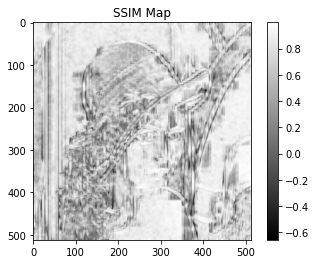

In [107]:
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
path = ""
image1 = img_as_float(io.imread(path + 'lena.png', as_gray=True))
image2 = img_as_float(io.imread('lena_reconstructed.png', as_gray=True))

if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

data_range = image1.max() - image1.min()

ssim_index, ssim_image = ssim(image1, image2, full=True, data_range=data_range)

print(f"SSIM Index: {ssim_index}")

plt.imshow(ssim_image, cmap='gray')
plt.title('SSIM Map')
plt.colorbar()
plt.show()